In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
import copy

columns = ['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light', 'voltage']
df = pd.read_csv('./datasets/Intellab.txt', sep=" ", header=None, names=columns)
df

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964
...,...,...,...,...,...,...,...,...
2313677,2004-04-02,01:14:54.164318,61274,NaN,NaN,NaN,NaN,NaN
2313678,2004-04-02,01:17:53.670524,61275,NaN,NaN,NaN,NaN,NaN
2313679,2004-04-02,01:20:52.807972,61276,NaN,NaN,NaN,NaN,NaN
2313680,2004-04-02,01:26:53.950342,61278,NaN,NaN,NaN,NaN,NaN


In [437]:
df.isna().sum()

date               0
time               0
epoch              0
moteid           526
temperature      901
humidity         902
light          93878
voltage          526
dtype: int64

In [438]:
df.dropna(subset=['temperature','humidity', 'light'], inplace=True)
df['moteid'] = df['moteid'].astype('int')
df.isna().sum()

date           0
time           0
epoch          0
moteid         0
temperature    0
humidity       0
light          0
voltage        0
dtype: int64

In [439]:
df

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1,122.15,-3.92,11.04,2.03
1,2004-02-28,00:59:16.02785,3,1,19.99,37.09,45.08,2.70
2,2004-02-28,01:03:16.33393,11,1,19.30,38.46,45.08,2.69
3,2004-02-28,01:06:16.013453,17,1,19.17,38.80,45.08,2.69
4,2004-02-28,01:06:46.778088,18,1,19.18,38.84,45.08,2.70
...,...,...,...,...,...,...,...,...
2313148,2004-04-02,09:06:21.488182,62421,58,24.17,21.66,1729.60,2.79
2313149,2004-04-02,09:07:22.173243,62423,58,24.14,21.73,1729.60,2.79
2313150,2004-04-02,09:07:52.31387,62424,58,24.14,21.66,1670.72,2.79
2313151,2004-04-02,09:08:52.189274,62426,58,24.12,21.58,1670.72,2.79


In [440]:
df.describe()

,epoch,moteid,temperature,humidity,light,voltage
count,2219803.00,2219803.00,2219803.00,2219803.00,2219803.00,2219803.00
mean,33011.38,28.48,39.23,33.73,407.21,2.49
std,18380.41,15.03,37.42,17.24,539.43,0.18
min,0.00,1.00,-38.40,-8983.13,0.00,0.01
25%,17575.00,17.00,20.46,31.84,39.56,2.39
50%,33292.00,29.00,22.47,39.21,158.24,2.53
75%,47765.00,41.00,26.98,43.49,537.28,2.63
max,65535.00,58.00,385.57,137.51,1847.36,3.16


In [441]:
# Drop noisy values
df = df[df['humidity']>=0]

In [442]:
df.describe()

,epoch,moteid,temperature,humidity,light,voltage
count,1932435.00,1932435.00,1932435.00,1932435.00,1932435.00,1932435.00
mean,30668.10,28.96,27.50,39.33,406.44,2.54
std,18287.50,15.20,21.78,7.44,540.40,0.13
min,0.00,1.00,-38.40,0.02,0.00,0.01
25%,15302.00,18.00,20.18,35.26,37.72,2.45
50%,29992.00,30.00,21.99,40.43,158.24,2.57
75%,44299.00,42.00,24.28,43.98,566.72,2.64
max,65535.00,58.00,385.57,137.51,1847.36,3.16


In [ ]:
# Bin the values
def discretize(df, bin_size):
    bins = np.arange(df.min(), df.max() + bin_size, bin_size)
    return pd.cut(df, bins, labels=False, include_lowest=True)

df['temp'] = discretize(df['temperature'].copy(), 2)
df['hum'] = discretize(df['humidity'].copy(), 5)
df['lgt'] = discretize(df['light'].copy(), 100)

In [444]:
df

,date,time,epoch,moteid,temperature,humidity,light,voltage,temp,hum,lgt
1,2004-02-28,00:59:16.02785,3,1,19.99,37.09,45.08,2.70,29,7,0
2,2004-02-28,01:03:16.33393,11,1,19.30,38.46,45.08,2.69,28,7,0
3,2004-02-28,01:06:16.013453,17,1,19.17,38.80,45.08,2.69,28,7,0
4,2004-02-28,01:06:46.778088,18,1,19.18,38.84,45.08,2.70,28,7,0
5,2004-02-28,01:08:45.992524,22,1,19.15,38.94,45.08,2.69,28,7,0
...,...,...,...,...,...,...,...,...,...,...,...
2313148,2004-04-02,09:06:21.488182,62421,58,24.17,21.66,1729.60,2.79,31,4,17
2313149,2004-04-02,09:07:22.173243,62423,58,24.14,21.73,1729.60,2.79,31,4,17
2313150,2004-04-02,09:07:52.31387,62424,58,24.14,21.66,1670.72,2.79,31,4,16
2313151,2004-04-02,09:08:52.189274,62426,58,24.12,21.58,1670.72,2.79,31,4,16


In [445]:

prob_temp = pd.DataFrame(df.groupby(['moteid','temp'])[['temp']].count().rename(columns={'temp':'temp_value'}).to_records())
temp_total = df.groupby(['moteid'],as_index=False)[['temp']].count().rename(columns={'temp':'temp_total'})
prob_temp = prob_temp.merge(temp_total,how='left',on='moteid')
prob_temp['probs'] = prob_temp.apply(lambda x: x['temp_value']/float(x['temp_total']),axis=1)
prob_temp['entropy'] = prob_temp.apply(lambda x: -x['probs']*log(x['probs']),axis=1)
prob_temp

,moteid,temp,temp_value,temp_total,probs,entropy
0,1,27,479,38664,0.01,0.05
1,1,28,4403,38664,0.11,0.25
2,1,29,11765,38664,0.30,0.36
3,1,30,12157,38664,0.31,0.36
4,1,31,4417,38664,0.11,0.25
...,...,...,...,...,...,...
2438,58,29,1187,4497,0.26,0.35
2439,58,30,1228,4497,0.27,0.35
2440,58,31,599,4497,0.13,0.27
2441,58,32,30,4497,0.01,0.03


In [446]:
prob_hum = pd.DataFrame(df.groupby(['moteid','hum'])[['hum']].count().rename(columns={'hum':'hum_value'}).to_records())
hum_total = df.groupby(['moteid'],as_index=False)[['hum']].count().rename(columns={'hum':'hum_total'})
prob_hum = prob_hum.merge(hum_total,how='left',on='moteid')
prob_hum['probs'] = prob_hum.apply(lambda x: x['hum_value']/float(x['hum_total']),axis=1)
prob_hum['entropy'] = prob_hum.apply(lambda x: -x['probs']*log(x['probs']),axis=1)
prob_hum

,moteid,hum,hum_value,hum_total,probs,entropy
0,1,0,20,38664,0.00,0.00
1,1,1,21,38664,0.00,0.00
2,1,2,16,38664,0.00,0.00
3,1,3,49,38664,0.00,0.01
4,1,4,324,38664,0.01,0.04
...,...,...,...,...,...,...
606,58,6,556,4497,0.12,0.26
607,58,7,1288,4497,0.29,0.36
608,58,8,1447,4497,0.32,0.36
609,58,9,547,4497,0.12,0.26


In [447]:
prob_lgt = pd.DataFrame(df.groupby(['moteid','lgt'])[['lgt']].count().rename(columns={'lgt':'lgt_value'}).to_records())
lgt_total = df.groupby(['moteid'],as_index=False)[['lgt']].count().rename(columns={'lgt':'lgt_total'})
prob_lgt = prob_lgt.merge(lgt_total,how='left',on='moteid')
prob_lgt['probs'] = prob_lgt.apply(lambda x: x['lgt_value']/float(x['lgt_total']),axis=1)
prob_lgt['entropy'] = prob_lgt.apply(lambda x: -x['probs']*log(x['probs']),axis=1)
prob_lgt

,moteid,lgt,lgt_value,lgt_total,probs,entropy
0,1,0,23158,38664,0.60,0.31
1,1,1,3812,38664,0.10,0.23
2,1,2,2883,38664,0.07,0.19
3,1,3,3432,38664,0.09,0.21
4,1,4,2832,38664,0.07,0.19
...,...,...,...,...,...,...
835,58,13,2,4497,0.00,0.00
836,58,14,10,4497,0.00,0.01
837,58,15,11,4497,0.00,0.01
838,58,16,17,4497,0.00,0.02


In [448]:
temp_entropy = prob_temp.groupby('moteid')['entropy'].sum().to_frame()
temp_entropy.rename(columns={'entropy':'entropy_temp'},inplace=True)
hum_entropy = prob_hum.groupby('moteid')['entropy'].sum().to_frame()
hum_entropy.rename(columns={'entropy':'entropy_hum'},inplace=True)
lgt_entropy = prob_lgt.groupby('moteid')['entropy'].sum().to_frame()
lgt_entropy.rename(columns={'entropy':'entropy_lgt'},inplace=True)

In [449]:
entropy = pd.merge(temp_entropy,hum_entropy,how='left',left_index=True,right_index=True)
entropy = entropy.merge(lgt_entropy,how='left',left_index=True,right_index=True)

In [450]:
entropy

,entropy_temp,entropy_hum,entropy_lgt
moteid,,,
1,1.88,1.50,1.35
2,1.70,1.35,1.58
3,1.62,1.48,1.27
4,1.69,1.33,1.40
6,1.64,1.35,2.22
7,1.67,1.36,1.28
8,1.54,1.41,2.13
9,1.67,1.57,1.79
10,1.60,1.41,1.54


In [461]:
def objective_function(S,df):
    sum = 0
    for j,i in enumerate(S):
        column = df.columns[j]
        sum += df.loc[i,column].sum()
    return sum

In [462]:
def calculate_marginal_difference(S,df, e):
    types = len(S)
    base = [objective_function(S,df)]*types
    next = []
    for i in range(types):
        new_set = copy.deepcopy(S)
        new_set[i].append(e)
        next.append(objective_function(new_set,df))
    margin = np.subtract(next,base).tolist()
    return margin

In [463]:
from collections import deque
import numpy as np

def submodular_maximization(C, D, B, df, topic=3):
    counter = 0
    S = [deque() for _ in range(topic)]  # Initialize S as a list of deques
    phi = [0] * topic  # Initialize phi for each topic
    
    for i in df.index:
        diff = calculate_marginal_difference(S, df, i)
        margin = np.subtract(diff,phi).tolist()

        index = margin.index(max(margin))
        if margin[index] >= 0:
            gamma = margin[index]
            phi[index] += (D/B[index])*diff[index] + (((C-D)/B[index])*gamma)

            if len(S[index]) < B[index]:
                S[index].append(i)
            else:
                S[index].popleft()
                S[index].append(i)
        counter +=1
    obj_value = objective_function(S,df)
    return S, obj_value, counter

In [466]:
topic = 3
B = [5] * topic
D = B[0] * (2**(1/B[0])-1)
C = 0.5*D 
result, obj_value, counter = submodular_maximization(C=C, D=D, B=B,df=entropy, topic=topic)
print(f'Result of Online Algorithm: {result}')
print(f'Result of the Objective Value: {round(obj_value,2)}')
print(f'Number of iterations: {counter} ')

Result of Online Algorithm: [deque([21, 23, 30, 32, 38]), deque([20, 22, 25, 27, 29]), deque([24, 26, 31, 33, 35])]
Result of the Objective Value: 31.68
Number of iterations: 55 


In [475]:
import copy
def calculate_marginal_difference_greedy(S,df, items, types):
    margin = {}
    base = objective_function(S,df)
    for e in items:
        for t in types:
            new_set = copy.deepcopy(S)
            new_set[t].append(e)
            margin[(e,t)] = objective_function(new_set,df) - base
    max_key = max(margin, key=margin.get)
    max_value = margin[max_key]
    return max_key, max_value

In [478]:
def greedy_algorithm(df, B, topic=3):
    S = [[] for _ in range(topic)]  # Initialize S as a list of lists
    B_total = sum(B)                # Find total budget
    elements = df.index.tolist()
    for _ in range(B_total):
        indices = list(filter(lambda x: B[x] > 0, range(len(B))))
        if not indices or not elements:
            break
        (e,i), _ = calculate_marginal_difference_greedy(S,df,elements, indices)
        S[i].append(e)
        elements.remove(e)
        B[i] -= 1
    obj_value = objective_function(S,df)
    return S, obj_value

In [479]:
topic = 3
B = [5] * topic
result, obj_value = greedy_algorithm(df=entropy,B=B, topic=topic)
print(f'Result of Greedy Algorithm: {result}')
print(f'Result of the Objective Value: {round(obj_value,2)}')

Result of Greedy Algorithm: [[25, 38, 24, 21, 26], [29, 32, 30, 22, 27], [41, 49, 37, 42, 40]]
Result of the Objective Value: 33.22


Text(0, 0.5, 'Function Value')

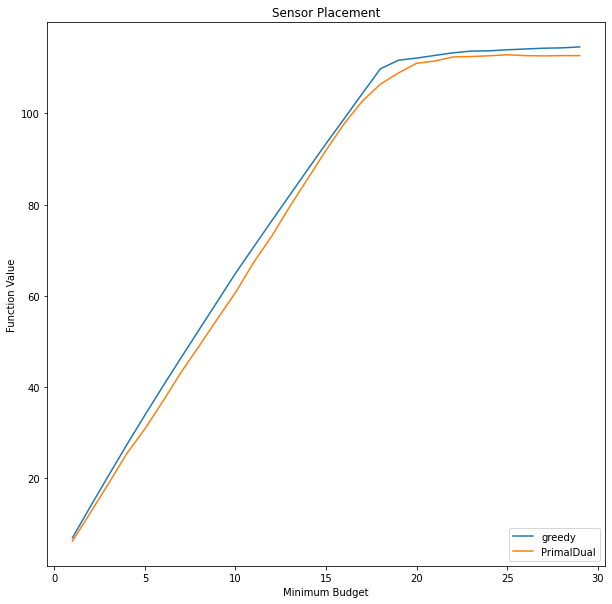

In [434]:
types = 3
results_greedy = []
results_proposed = []
num_iter = 5
std = []
for b in range(1,30):
    B = [b]*types
    D = B[0] * (2**(1/B[0])-1)
    C = 0.5*D
    _, result_greedy  = greedy_algorithm(entropy,B,types)
    results_greedy.append(result_greedy)
    sub_eval = []
    for i in range(num_iter):
        df_shuffled = entropy.sample(frac=1)
        B = [b]*types
        _, result_proposed  = submodular_maximization(C,D,B,df_shuffled,types)
        sub_eval.append(result_proposed)
    
    results_proposed.append(np.mean(sub_eval))
    std.append(np.std(sub_eval))
stats = pd.DataFrame({'B': list(range(1,30)), 'Mean': results_proposed, 'Std': std})
plt.figure(figsize=(10,10))
plt.plot(list(range(1,30)), results_greedy, label="greedy")
plt.plot(list(range(1,30)), results_proposed, label = "PrimalDual")
plt.legend(loc="lower right")
plt.title('Sensor Placement')
plt.xlabel('Minimum Budget')
plt.ylabel('Function Value')


In [435]:
stats

,B,Mean,Std
0,1,6.25,0.23
1,2,12.53,0.43
2,3,18.91,0.34
3,4,25.45,0.49
4,5,30.85,0.20
5,6,36.94,0.78
6,7,43.26,0.25
7,8,49.05,0.66
8,9,54.96,0.89
9,10,60.73,0.38
